In [2]:
#------------------------------------------------Employee Attrtion-----------------------------------------------------------

import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, recall_score, f1_score, confusion_matrix

In [3]:
#load the dataset :-

df = pd.read_csv("C:/Users/91801/Desktop/csv_datas/Employee_Attrition.csv")
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
#Change the columns lower case

df.columns = df.columns.str.lower()

In [5]:
#descritive Analysis
df.info()
df["businesstravel"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [6]:
df.describe()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.describe(include="object")

,attrition,businesstravel,department,educationfield,gender,jobrole,maritalstatus,over18,overtime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


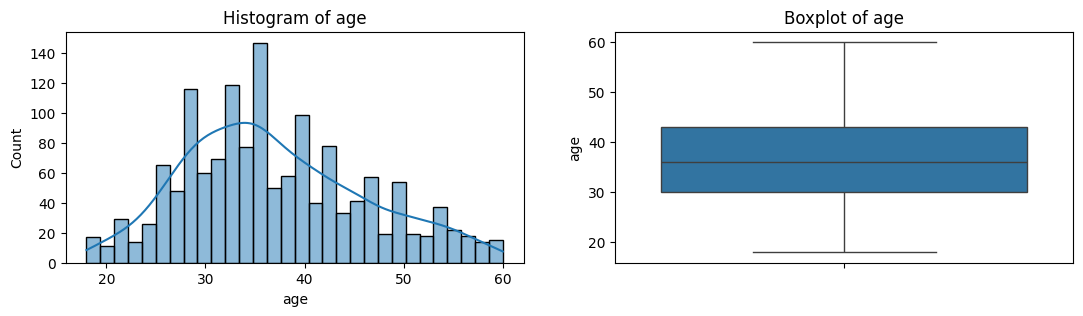

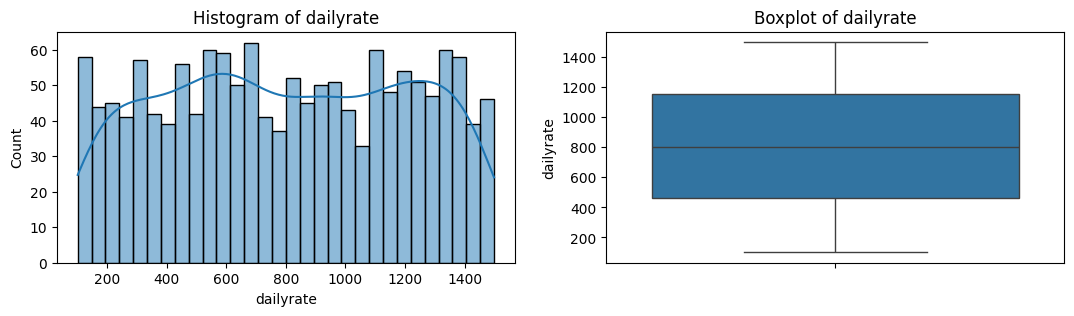

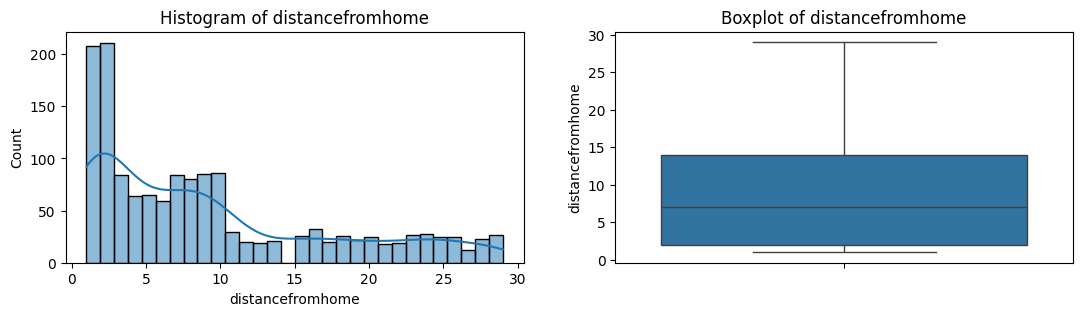

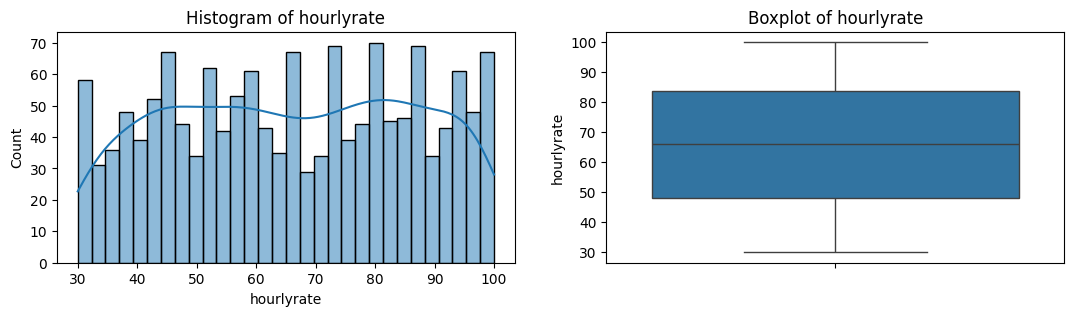

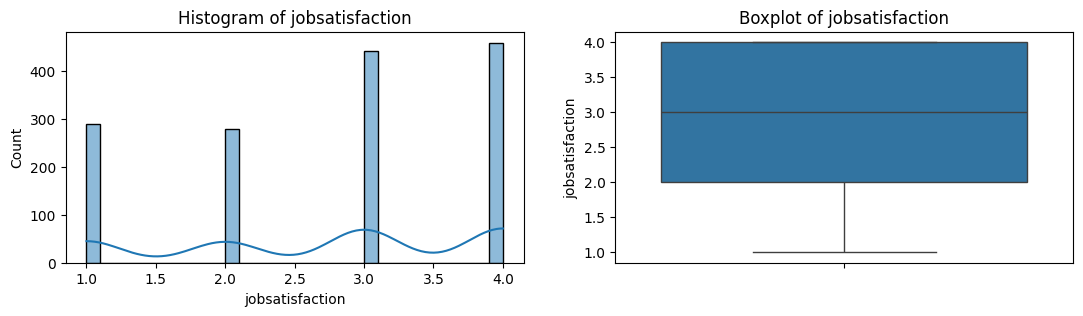

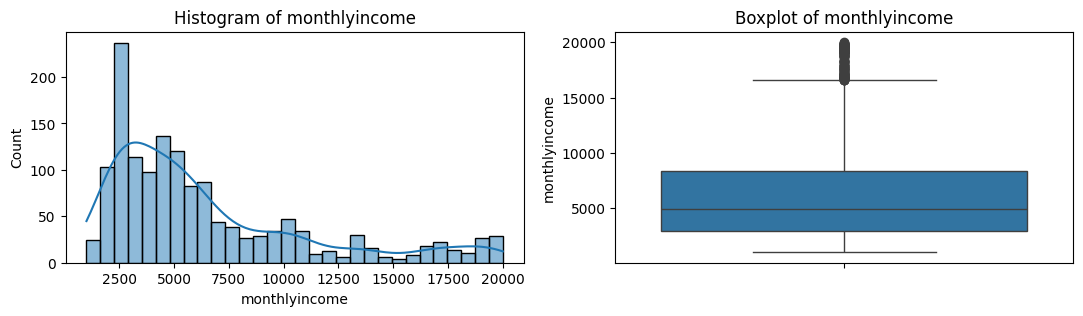

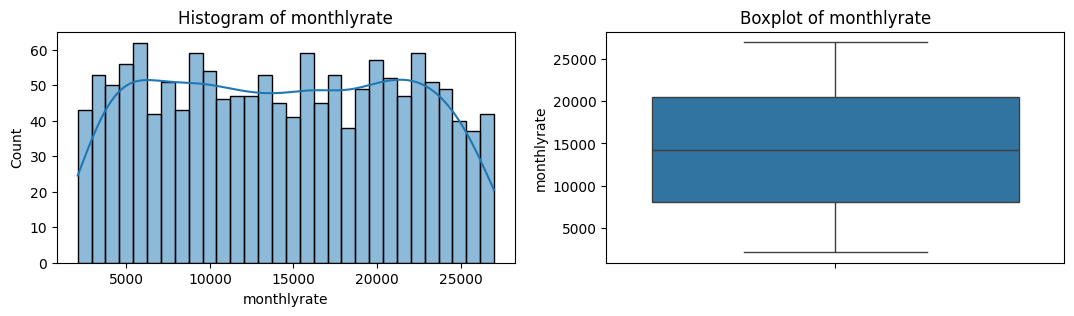

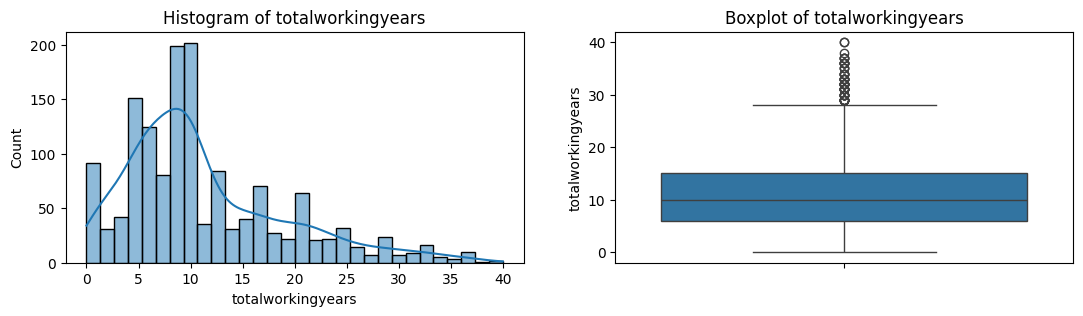

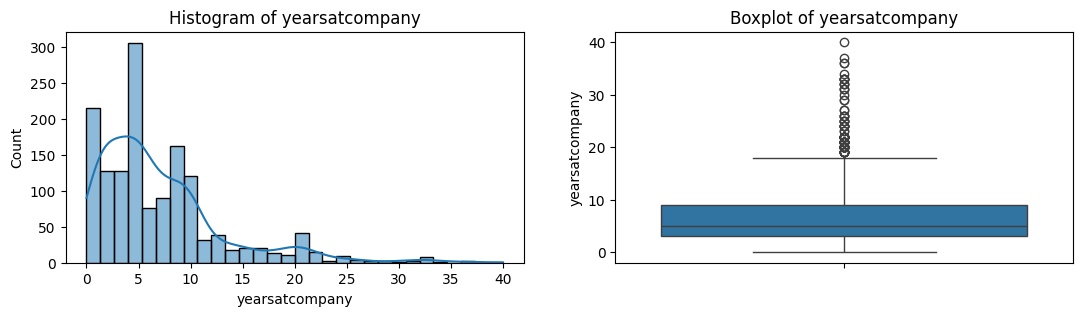

In [8]:
#----------------------------------------------EDA (Exploratory Data analysis)------------------------------------------------

num_features = df[["age", "dailyrate", "distancefromhome", "hourlyrate", "jobsatisfaction", "monthlyincome",
                   "monthlyrate", "totalworkingyears", "yearsatcompany"]]


for col in num_features:
    plt.figure(figsize=(13, 3))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

    plt.show()

<Axes: xlabel='businesstravel', ylabel='count'>

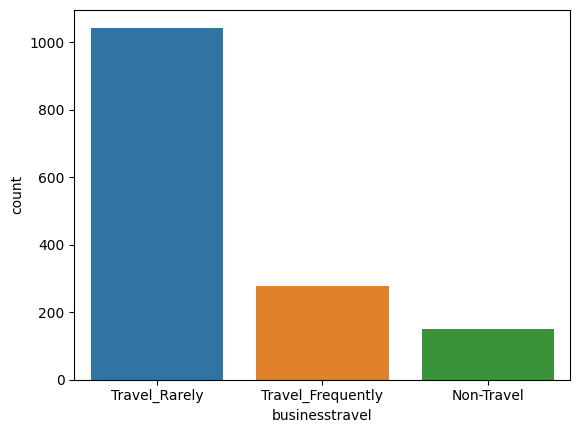

In [9]:
sns.countplot(data=df, x="businesstravel", hue="businesstravel")

<Axes: xlabel='department', ylabel='count'>

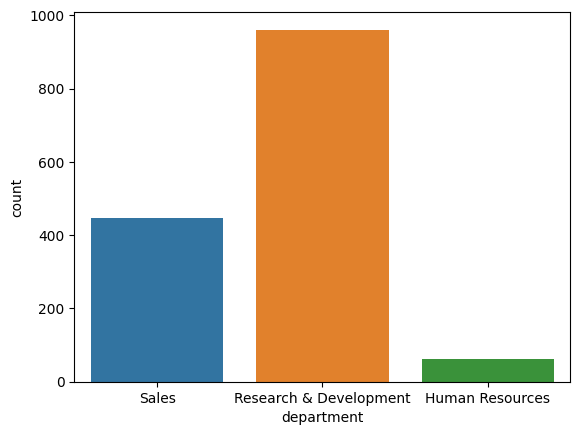

In [10]:
sns.countplot(data=df, x="department", hue="department")

<Axes: xlabel='gender', ylabel='count'>

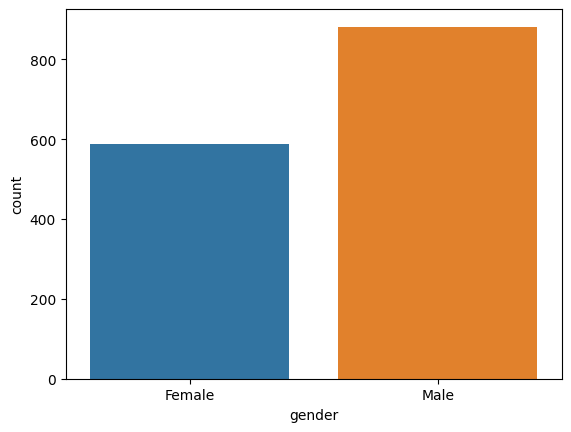

In [11]:
sns.countplot(data=df, x="gender", hue="gender")

<Axes: xlabel='count', ylabel='jobrole'>

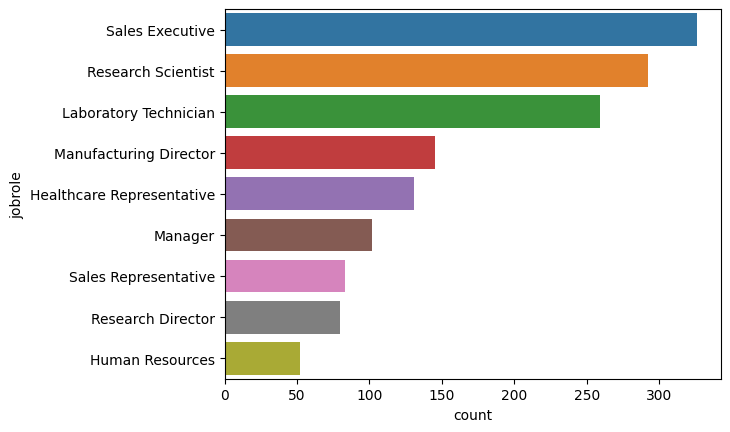

In [12]:
sns.countplot(data=df, y="jobrole", hue="jobrole")

<Axes: xlabel='overtime', ylabel='count'>

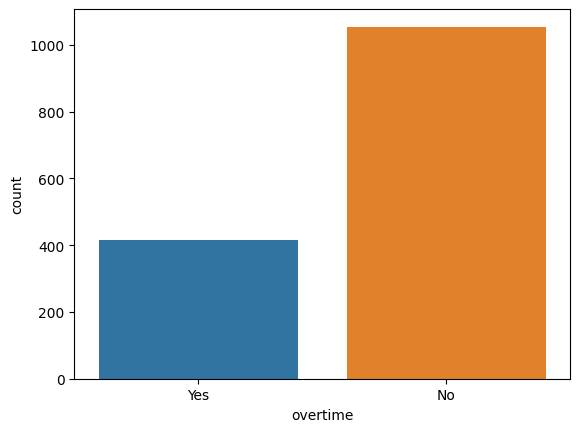

In [13]:
sns.countplot(data=df, x="overtime", hue="overtime")

<Axes: xlabel='age', ylabel='Count'>

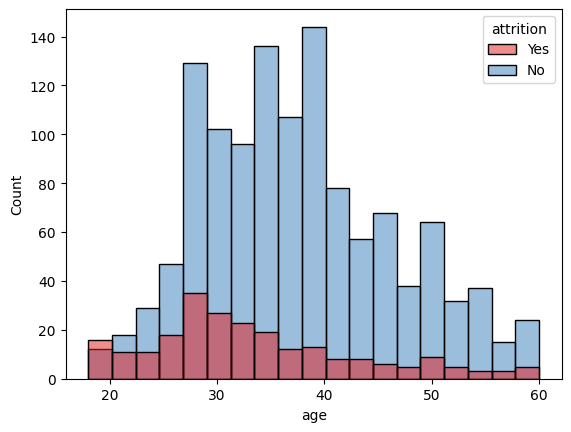

In [14]:
sns.histplot(data=df, x="age",hue="attrition", palette="Set1")

<Axes: xlabel='businesstravel', ylabel='count'>

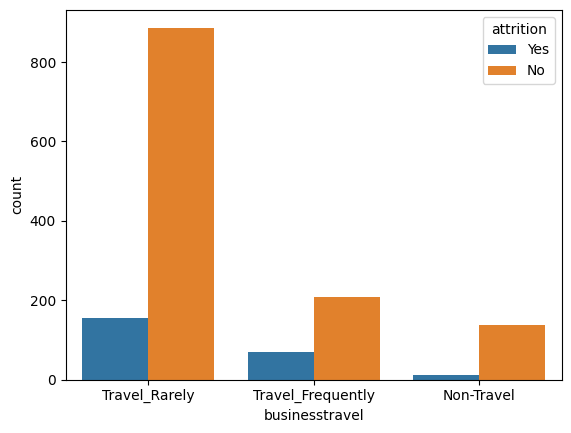

In [15]:
sns.countplot(data=df, x="businesstravel", hue="attrition")

<Axes: xlabel='gender', ylabel='count'>

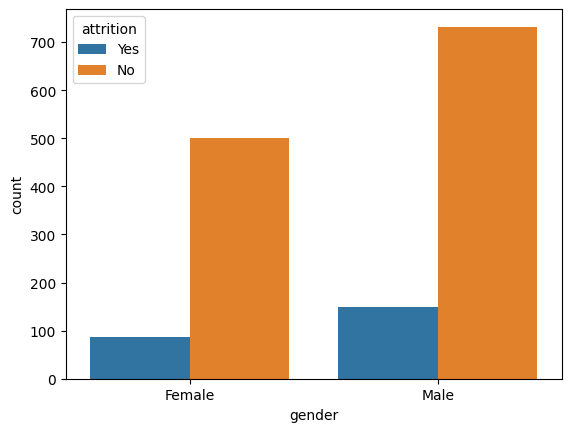

In [16]:
sns.countplot(data=df, x="gender", hue="attrition")

<Axes: xlabel='count', ylabel='jobrole'>

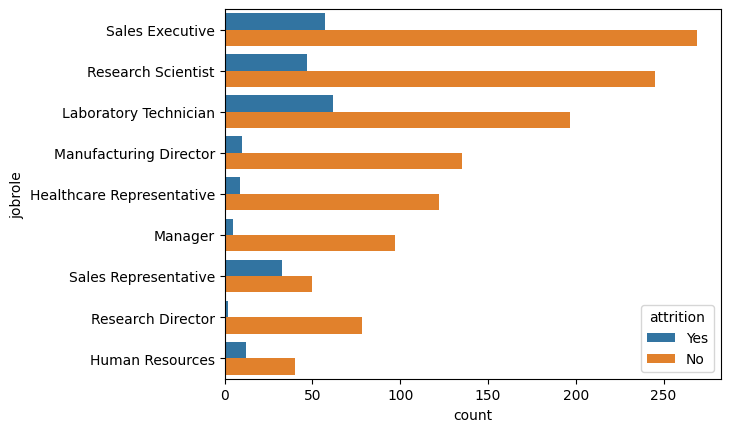

In [17]:
sns.countplot(data=df, y="jobrole", hue="attrition")

<Axes: xlabel='overtime', ylabel='count'>

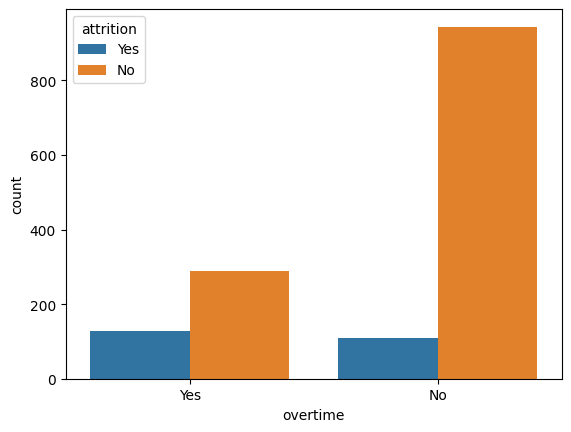

In [18]:
sns.countplot(data=df, x="overtime", hue="attrition")

<Axes: xlabel='jobsatisfaction', ylabel='count'>

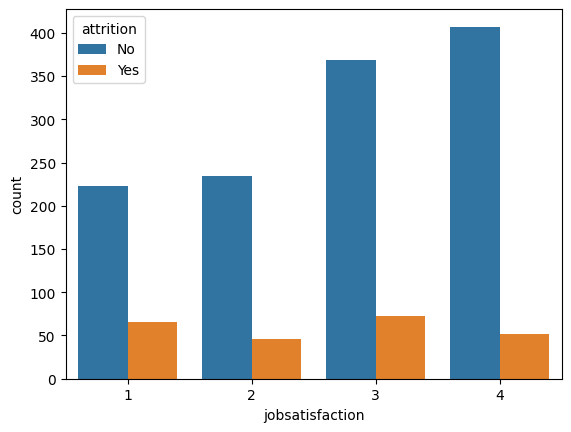

In [19]:
sns.countplot(data=df, x="jobsatisfaction", hue="attrition")

<Axes: xlabel='monthlyincome', ylabel='Count'>

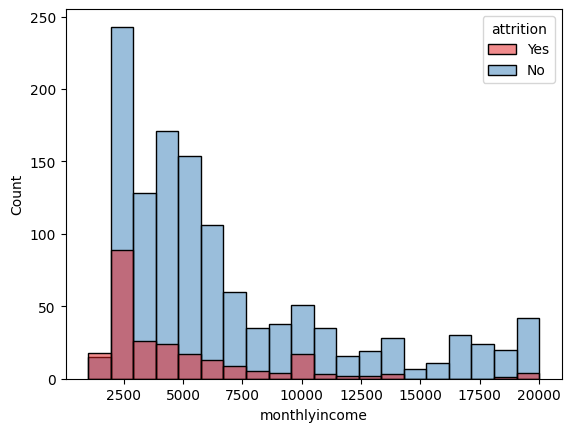

In [20]:
sns.histplot(data=df, x="monthlyincome", hue="attrition", palette="Set1")

<Axes: xlabel='totalworkingyears', ylabel='Count'>

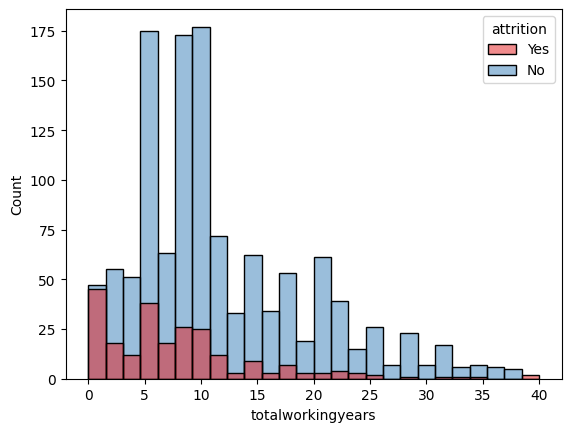

In [21]:
sns.histplot(data=df, x="totalworkingyears", hue="attrition",palette="Set1")

<Axes: xlabel='yearsatcompany', ylabel='Count'>

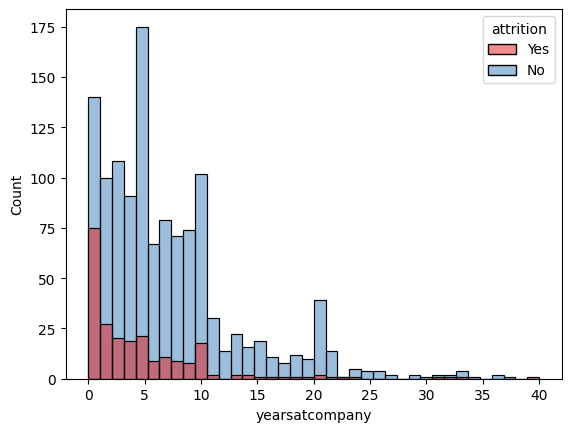

In [22]:
sns.histplot(data=df, x="yearsatcompany", hue="attrition",palette="Set1")

<Axes: xlabel='yearssincelastpromotion', ylabel='Count'>

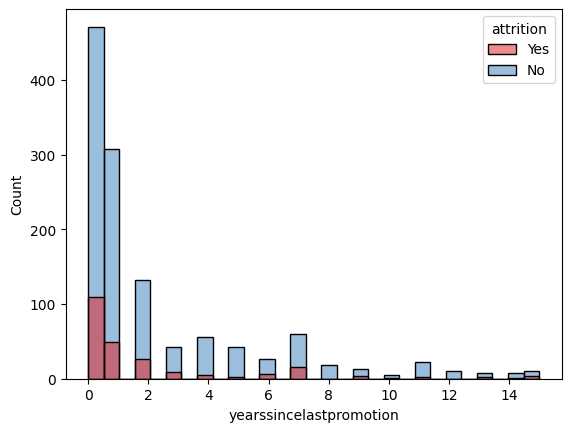

In [23]:
sns.histplot(data=df, x="yearssincelastpromotion", hue="attrition", palette="Set1")

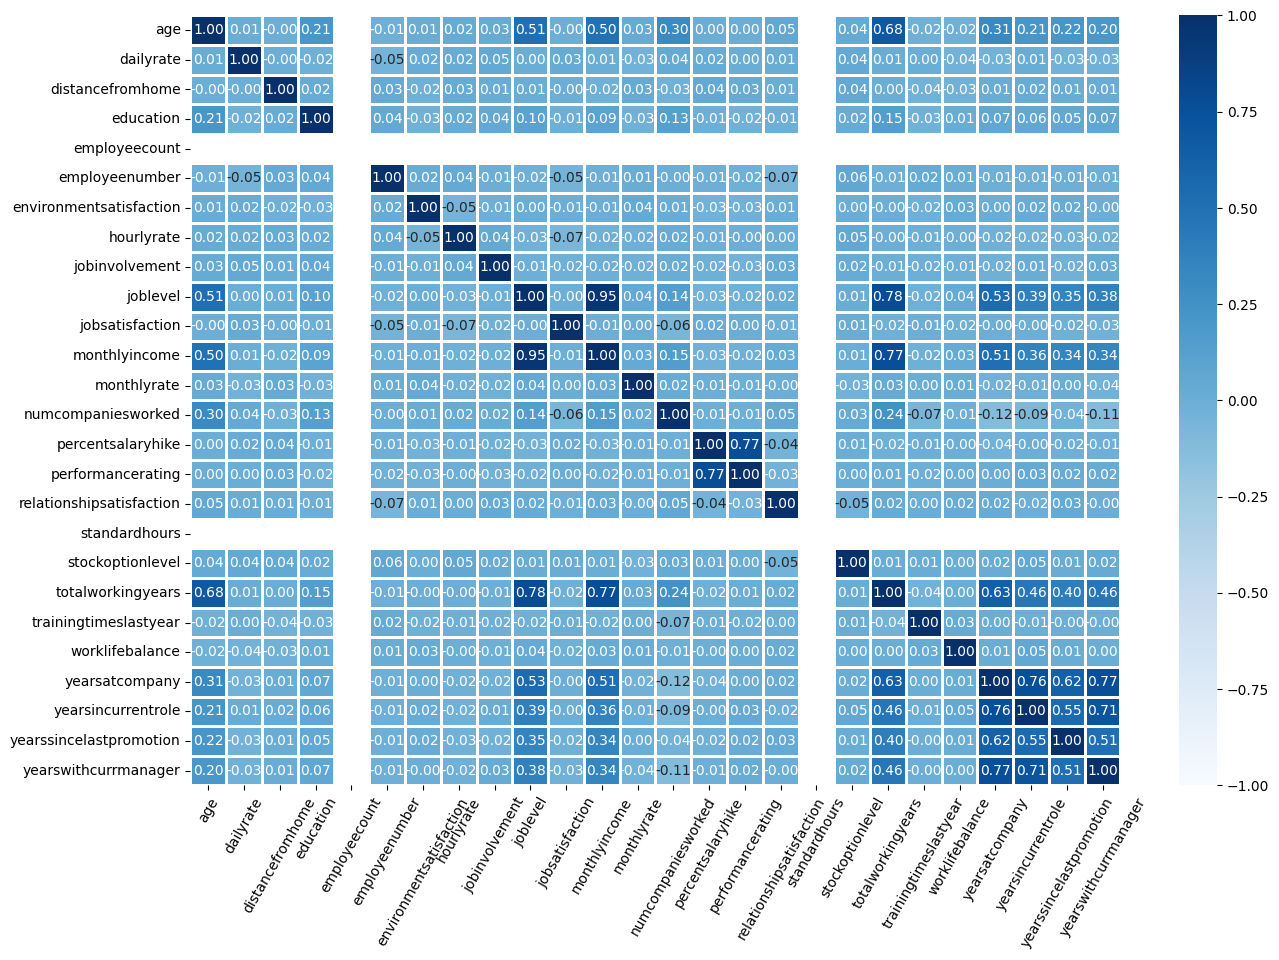

In [24]:
corr = df.select_dtypes(include="number").corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f", vmin=-1, vmax=1, linewidths=1, linecolor="white")
plt.xticks(rotation=60)
plt.show()

In [25]:
#outlier treat :-

q1 = df["totalworkingyears"].quantile(0.25)
q3 = df["totalworkingyears"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df["totalworkingyears"] > lower_bound) & (df["totalworkingyears"] < upper_bound)]

In [26]:
q1 = df["yearsatcompany"].quantile(0.25)
q3 = df["yearsatcompany"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df["yearsatcompany"] > lower_bound) & (df["yearsatcompany"] < upper_bound)]

In [27]:
#Label Encoding :-

LE = LabelEncoder()
df["gender"] = LE.fit_transform(df["gender"])
df["overtime"] = LE.fit_transform(df["overtime"])

In [28]:
# feature selection :-

x = df[["age", "dailyrate", "distancefromhome", "gender", "jobsatisfaction", "monthlyincome", "monthlyrate", "overtime", "percentsalaryhike", "totalworkingyears", "yearsatcompany"]]
y = df["attrition"]

In [29]:
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [31]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [32]:
model = RandomForestClassifier()

In [33]:
model.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [34]:
y_pred = model.predict(x_test_scaled)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="Yes")
recall = recall_score(y_test, y_pred, pos_label="Yes")
f1 = f1_score(y_test, y_pred, pos_label="Yes")
conf_matrix = confusion_matrix(y_test, y_pred)

In [36]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.83
Precision: 0.79
Recall: 0.89
F1 Score: 0.84
Confusion Matrix:
[[168  51]
 [ 25 193]]


In [37]:
cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=5)
print("Cross-validation mean score :", cv_scores.mean())

Cross-validation mean score : 0.8380122799836267


In [38]:
#dump and create file for model

joblib.dump(model, "employee_attrition.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model saved successfully!")

Model saved successfully!


In [39]:
# yes - 37, 1373, 2, 1, 3, 2090, 2396, 1, 15, 7, 0
# no - 59, 1324, 3, 0, 1, 2670, 9964, 1, 20, 12, 2

data = scaler.transform([[37, 1373, 2, 1, 3, 2090, 2396, 1, 15, 7, 0]])
model.predict(data)

c:\Users\91801\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)